In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r'D:\MASAI\Python\Python Project/globalterrorismdb_0718dist1.csv',encoding = "latin1")
data.head()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [4]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':"Day",'gname':'Group','country_txt':'Country','region_txt':'Region',
                    'provstate':'State','city':'City','latitude':'Latitude','longitude':'Longitude','summary':'Summary',
                     'attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'Kill',
                     'nwound':'Wound'},inplace=True)

In [5]:
data.columns.values


array(['eventid', 'Year', 'Month', 'Day', 'approxdate', 'extended',
       'resolution', 'country', 'Country', 'region', 'Region', 'State',
       'City', 'Latitude', 'Longitude', 'specificity', 'vicinity',
       'location', 'Summary', 'crit1', 'crit2', 'crit3', 'doubtterr',
       'alternative', 'alternative_txt', 'multiple', 'success', 'suicide',
       'attacktype1', 'Attacktype', 'attacktype2', 'attacktype2_txt',
       'attacktype3', 'attacktype3_txt', 'targtype1', 'Targettype',
       'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1',
       'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2',
       'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt',
       'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt',
       'corp3', 'target3', 'natlty3', 'natlty3_txt', 'Group', 'gsubname',
       'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive',
       'guncertain1', 'guncertain2', 'guncertain3', 'individual',
       'nperps', 'n

In [6]:
data = data[['Year','Month','Day','Country','State','Region','City','Latitude','Longitude',"Attacktype",'Kill',
               'Wound','target1','Summary','Group','Targettype','Weapon','motive']]

In [7]:
data.head()

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,Attacktype,Kill,Wound,target1,Summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [8]:
data.shape

(181691, 18)

In [9]:
data.isnull().sum()

Year               0
Month              0
Day                0
Country            0
State            421
Region             0
City             434
Latitude        4556
Longitude       4557
Attacktype         0
Kill           10313
Wound          16311
target1          636
Summary        66129
Group              0
Targettype         0
Weapon             0
motive        131130
dtype: int64

In [10]:
data['Wound'] = data['Wound'].fillna(0)
data['Kill'] = data['Kill'].fillna(0)

In [11]:
data['Casualities'] = data['Kill'] + data['Wound']

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   City         181257 non-null  object 
 7   Latitude     177135 non-null  float64
 8   Longitude    177134 non-null  float64
 9   Attacktype   181691 non-null  object 
 10  Kill         181691 non-null  float64
 11  Wound        181691 non-null  float64
 12  target1      181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Targettype   181691 non-null  object 
 16  Weapon       181691 non-null  object 
 17  motive       50561 non-null   object 
 18  Casualities  181691 non-

In [13]:
data.describe()

,Year,Month,Day,Latitude,Longitude,Kill,Wound,Casualities
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


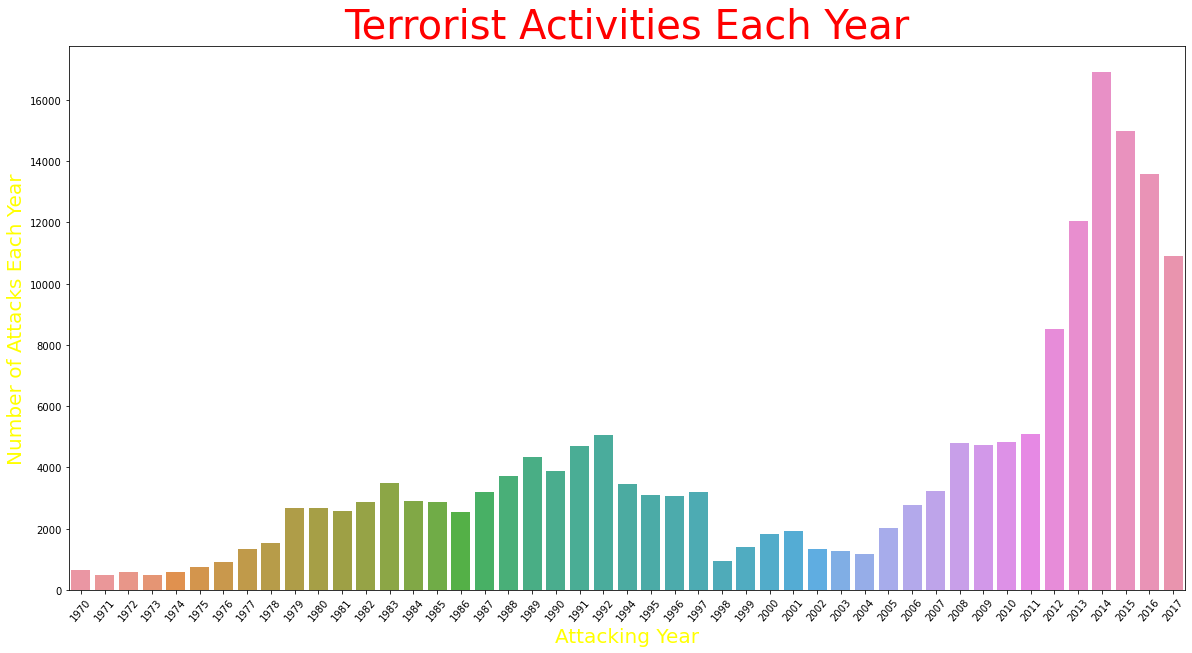

In [50]:
year = data['Year'].unique()
years_count = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (20,10))
sns.barplot(x = year,y = years_count)
plt.xticks(rotation = 50)
plt.xlabel('Attacking Year',fontsize=20,color = "yellow")
plt.ylabel('Number of Attacks Each Year',fontsize=20,color="yellow")
plt.title('Terrorist Activities Each Year',fontsize=40,color = "red")
plt.show()

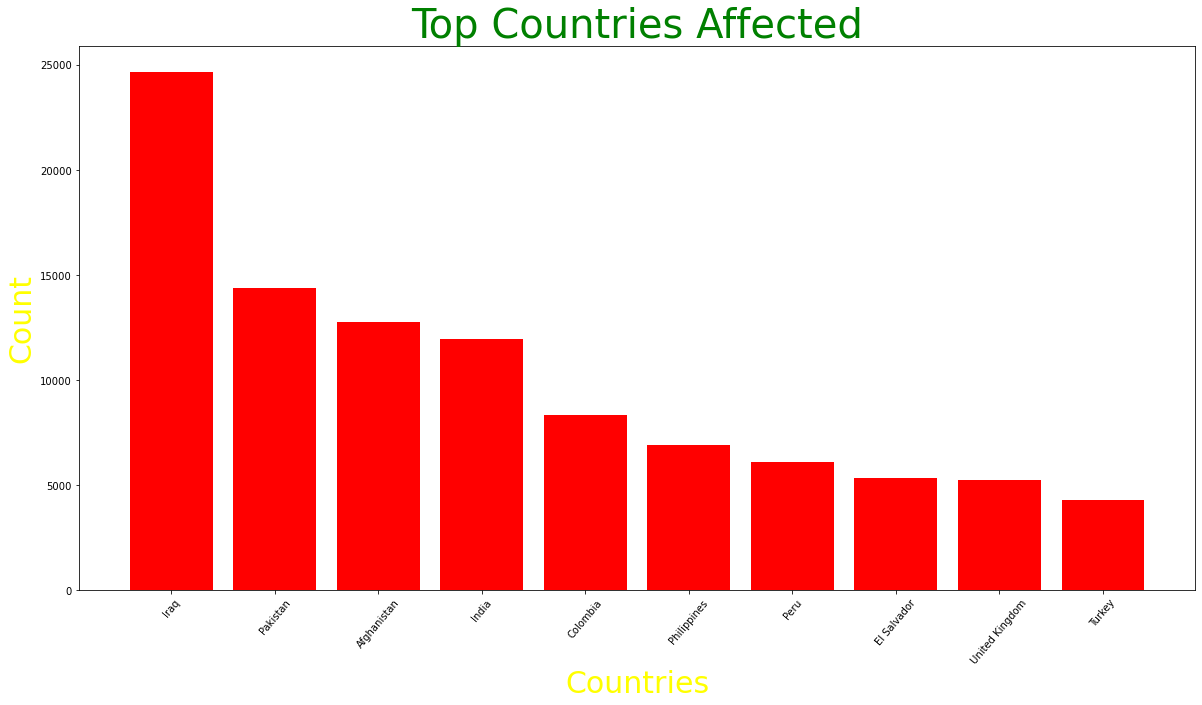

In [15]:
plt.subplots(figsize=(20,10))
plt.bar(data['Country'].value_counts()[:10].index,data['Country'].value_counts()[:10].values,color = "red")
plt.title('Top Countries Affected',fontsize = 40,color = "green")
plt.xlabel('Countries',fontsize = "30",color = "yellow")
plt.ylabel('Count',fontsize = "30",color = "yellow")
plt.xticks(rotation = 50)
plt.show()

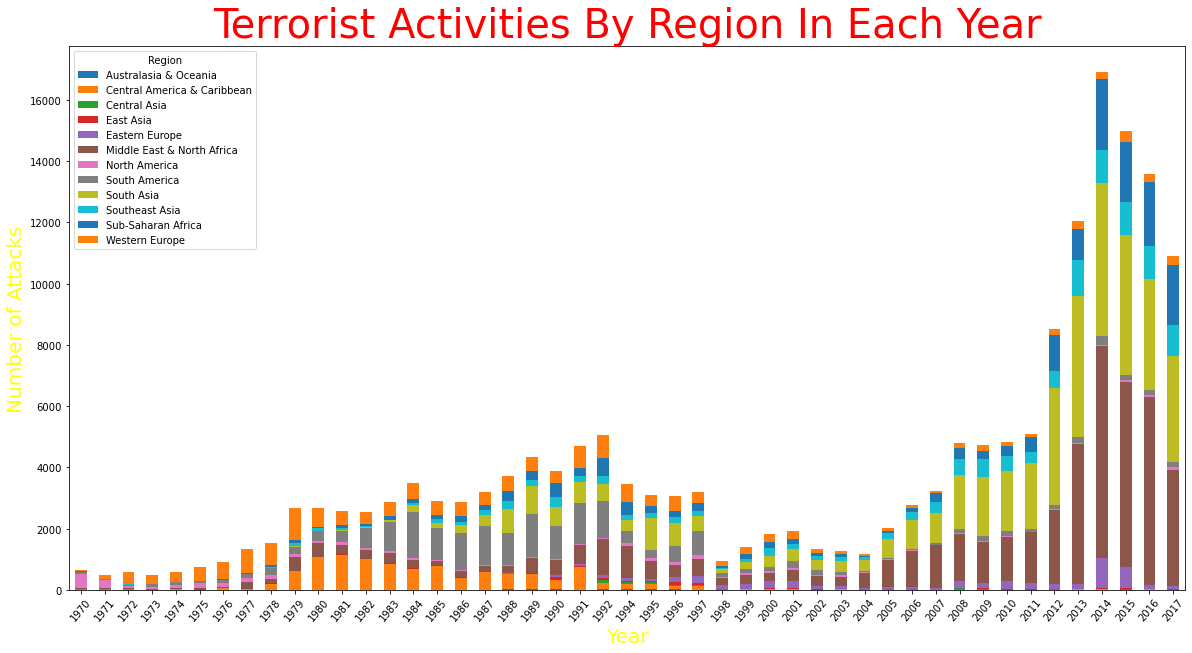

In [16]:
pd.crosstab(data.Year, data.Region).plot(kind='bar',stacked=True,figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year',fontsize=40, color = "red")
plt.ylabel('Number of Attacks',fontsize=20,color = "yellow")
plt.xlabel("Year",fontsize=20, color = "yellow")
plt.xticks(rotation = 50)
plt.show()

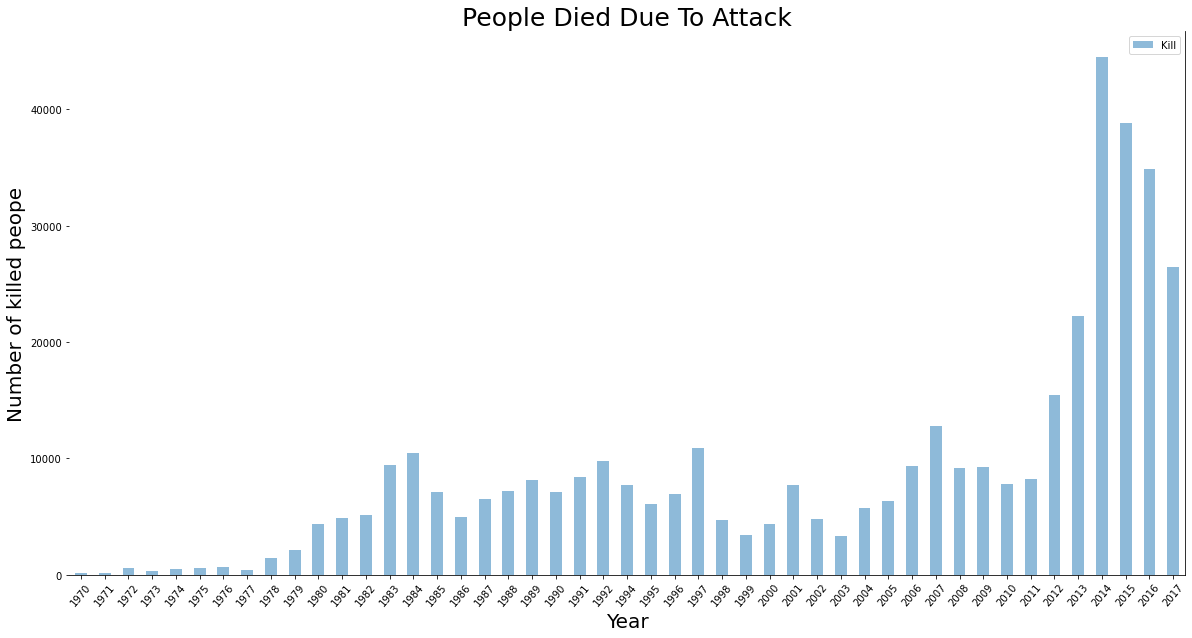

In [18]:
df = data[['Year','Kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
df.plot(kind='bar',alpha=0.5,ax=ax4)
plt.xticks(rotation = 50)
plt.title("People Died Due To Attack",fontsize=25)
plt.ylabel("Number of killed peope",fontsize=20)
plt.xlabel('Year',fontsize=20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["left"]
right_side.set_visible(False)


In [19]:
#pivot table

In [20]:
pivot_data = data[["Country","Year"]]
pivot_data

,Country,Year
0,Dominican Republic,1970
1,Mexico,1970
2,Philippines,1970
3,Greece,1970
4,Japan,1970
...,...,...
181686,Somalia,2017
181687,Syria,2017
181688,Philippines,2017
181689,India,2017


In [21]:
pivot_data["value"] = data["Kill"]
table = pd.pivot_table(pivot_data,values = "value" ,index = ["Country"],columns = ["Year"],fill_value = 0)
table

Year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.666667,...,2.637681,2.117296,2.134686,3.622328,2.396869,2.570340,2.968202,3.224066,3.798392,4.308345
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,2.327103,1.888889,1.090000,1.666667,0.731707,4.590909,2.846154,1.312500,1.000000,0.857143
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.333333,...,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yemen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,3.363636,2.043478,3.080357,3.906780,3.384615,1.468235,1.773263,3.575301,2.889524,3.371681
Yugoslavia,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Zaire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [22]:
attack = data.Country.value_counts()[:10]
attack

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

In [23]:
#Terrorist attack of particluar year oand their locations

In [24]:
data.loc[data["Year"]== 2001]

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,Attacktype,Kill,Wound,target1,Summary,Group,Targettype,Weapon,motive,Casualities
71650,2001,1,0,Colombia,Valle del Cauca,South America,Unknown,3.800889,-76.641271,Unknown,3.0,0.0,Farmers in Valle province,1/8/2001: Paramilitaries killed three farmers ...,Paramilitaries,Private Citizens & Property,Unknown,"Specific motive is unknown; however, authoriti...",3.0
71651,2001,1,1,Yemen,Adan,Middle East & North Africa,Aden,12.825647,44.846416,Bombing/Explosion,0.0,0.0,Aden Anglican Church,01/01/2001: The wall of an Anglican Church was...,Unknown,Religious Figures/Institutions,Explosives,Unknown,0.0
71652,2001,1,1,Colombia,Bogota,South America,Bogota district,4.598100,-74.076030,Hostage Taking (Kidnapping),0.0,0.0,Colombian Peasants,01/01/2001: The United Self-defense Forces of ...,United Self Defense Units of Colombia (AUC),Private Citizens & Property,Unknown,The peasants were taken until it could be prov...,0.0
71653,2001,1,1,Turkey,Istanbul,Middle East & North Africa,Istanbul,41.106178,28.689863,Bombing/Explosion,0.0,10.0,Civilians celebrating the new year,1/1/2001: An improvised explosive device went ...,Unknown,Private Citizens & Property,Explosives,"Specific motive is unknown; however, sources s...",10.0
71654,2001,1,1,Algeria,Djelfa,Middle East & North Africa,Djelfa,34.666667,3.250000,Unknown,5.0,1.0,An Algerian family in Djelfa,"1/1/2000: Unknown perpetrators, believed to be...",Algerian Islamic Extremists,Private Citizens & Property,Unknown,Part of a campaign by Islamic extremists to de...,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73551,2001,12,28,Angola,Cuanza Norte,Sub-Saharan Africa,N'dalatando,-9.298851,14.916506,Armed Assault,2.0,2.0,Ndalatando Police Officers road between Ndalat...,"12/28/2001: Two police officers were killed, a...",National Union for the Total Independence of A...,Police,Firearms,Unknown,4.0
73552,2001,12,28,Uganda,Eastern,Sub-Saharan Africa,Mbale,1.078444,34.181006,Armed Assault,1.0,0.0,Michael Stachofsky,"12/28/2001: A prominent American missionary, M...",Unknown,Religious Figures/Institutions,Firearms,Unknown,1.0
73553,2001,12,30,India,Jammu and Kashmir,South Asia,Kanthol,33.322586,74.505312,Armed Assault,4.0,0.0,"Civilians in Kanthol, India",12/30/2001: Muslim militants killed four peopl...,Unknown,Private Citizens & Property,Firearms,Unknown,4.0
73554,2001,12,30,Russia,Chechnya (Republic),Eastern Europe,Grozny,43.320229,45.654491,Armed Assault,4.0,0.0,Russian soldiers in a military patrol in Grozn...,12/30/2001: A Russian patrol of military vehic...,Armed Forces of the Chechen Republic of Ichkeria,Military,Firearms,Unknown,4.0


In [25]:
#country longitute and latitute

In [26]:
table1 = data[["Country",'Latitude','Longitude']]
list(table1.values.tolist())

[['Dominican Republic', 18.456792, -69.951164],
 ['Mexico', 19.371887, -99.086624],
 ['Philippines', 15.478598, 120.599741],
 ['Greece', 37.99749, 23.762728],
 ['Japan', 33.580412, 130.396361],
 ['United States', 37.005105, -89.176269],
 ['Uruguay', -34.891151, -56.187214],
 ['United States', 37.791927, -122.225906],
 ['United States', 43.076592, -89.412488],
 ['United States', 43.07295, -89.386694],
 ['United States', 43.4685, -89.744299],
 ['United States', 39.758968, -104.876305],
 ['Italy', 41.890961, 12.490069],
 ['United States', 42.331685, -83.047924],
 ['United States', 18.386932, -66.061127],
 ['East Germany (GDR)', 52.50153, 13.401851],
 ['Ethiopia', nan, nan],
 ['United States', 40.697132, -73.931351],
 ['United States', 18.379998, -65.830948],
 ['United States', 47.610786, -122.331306],
 ['United States', 40.116748, -88.23927],
 ['Uruguay', -34.891151, -56.187214],
 ['United States', 47.610786, -122.331306],
 ['United States', 47.610786, -122.331306],
 ['United States', 40.

In [27]:
#terrorist organisation in each country

In [28]:
data.Group.value_counts()

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
                                                    ...  
Ansar Sarallah                                          1
Sword of Islam                                          1
Support of Ocalan-The Hawks of Thrace                   1
Arab Revolutionary Front                                1
MANO-D                                                  1
Name: Group, Length: 3537, dtype: int64

In [29]:
kill= data.loc[:,"Kill"]
print('Total number of people killed by terror attack: ',int(sum(kill.dropna())))

Total number of people killed by terror attack:  411868


In [30]:
type_of_death = data.pivot_table(columns ="Attacktype",values = "Kill",aggfunc = 'sum')
type_of_death

Attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Kill,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


In [31]:
country_wise_death = data.pivot_table(columns = "Country", values = "Kill", aggfunc = "sum")
country_wise_death

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Kill,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,...,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0


In [32]:
#people killed by terrorist organistaion country wise

In [33]:
data2 = data[["Group","Country","Kill"]]
data2 = data.groupby(["Group","Country"],axis = 0).sum().sort_values("Kill",ascending = False).drop("Unknown").drop(
                                                                        ["Year","Month","Day","Latitude","Longitude",
                                                                         "Wound","Casualities"],axis = 1)[:20]
data2

,,Kill
Group,Country,
Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
Taliban,Afghanistan,29269.0
Boko Haram,Nigeria,16917.0
Shining Path (SL),Peru,11595.0
Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
Al-Shabaab,Somalia,8176.0
Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
